In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lxml

In [2]:
# Ensure the project directory is set correctly
if not set(["notebooks", "scripts"]).issubset(os.listdir()):
    os.chdir(os.path.dirname(os.getcwd()))

print(os.getcwd())

/Users/jfraeys/Library/CloudStorage/GoogleDrive-jfraeys@gmail.com/My Drive/School/UoGuelph/MSc/Research/soft_skills_job_desc/jfraeysd


In [3]:
# Define file paths
soft_skills_tfidf_by_program_name_filename = (
    "reports/prg_name_tfidf.csv"
)

In [4]:
# Check if running in Google Colab
try:
    import google.colab

    IN_COLAB = True
except ImportError:
    IN_COLAB = False

In [5]:
# Mount Google Drive and adjust file paths if in Google Colab
if IN_COLAB:
    drive_mounted_path = "/content/drive"

    if not os.path.exists(drive_mounted_path):
        from google.colab import drive

        drive.mount(drive_mounted_path)

    project_dir = "My Drive/School/UoGuelph/MSc/Research/soft_skills_job_desc/jfraeysd"
    job_desc_filename = os.path.join(drive_mounted_path, project_dir, job_desc_filename)
    foundal_skills_filename = os.path.join(
        drive_mounted_path, project_dir, foundal_skills_filename
    )

In [6]:
# Read job description data
df_soft_skills_tfidf_by_program_name = pd.read_csv(
    soft_skills_tfidf_by_program_name_filename
)

In [7]:
df_soft_skills_tfidf_by_program_name

,program_name,active listen,goal,decision,accountability,decision make,creativity,curiosity,analytical,communication,...,eagerness,speak,influence,kindness,hospitality,conflict management,social skill,persuasion,interpersonal communication,self organize
0,Biological Engineering,0.012973,0.011720,0.009882,0.011509,0.009228,0.006760,0.005848,0.006772,0.006350,...,0.000866,0.000930,0.000583,0.000662,0.000228,0.000187,0.000134,0.000036,0.000016,0.000000
1,Biomedical Engineering,0.013086,0.011435,0.010587,0.011905,0.010008,0.007448,0.006043,0.007150,0.006495,...,0.000865,0.001007,0.000623,0.000773,0.000197,0.000228,0.000146,0.000040,0.000025,0.000000
2,Computer Engineering,0.015273,0.011596,0.012185,0.010739,0.011308,0.009794,0.006851,0.006581,0.006000,...,0.001467,0.001227,0.000943,0.000673,0.000940,0.000122,0.000083,0.000078,0.000051,0.000029
3,Computer Science,0.016226,0.011825,0.012227,0.010684,0.011230,0.010323,0.007227,0.007269,0.006034,...,0.001570,0.001280,0.001114,0.000667,0.001117,0.000130,0.000067,0.000090,0.000045,0.000034
4,Engineering Systems & Computing,0.014964,0.011528,0.012165,0.010786,0.011319,0.009656,0.006717,0.006363,0.005967,...,0.001433,0.001209,0.000920,0.000698,0.000881,0.000125,0.000082,0.000066,0.000064,0.000026
5,Environmental Engineering,0.013426,0.012820,0.010764,0.011233,0.010013,0.006301,0.006122,0.005646,0.006163,...,0.000799,0.000999,0.000562,0.000535,0.000259,0.000213,0.000136,0.000033,0.000044,0.000000
6,Mechanical Engineering,0.013575,0.012253,0.012417,0.011896,0.011760,0.007987,0.006039,0.005189,0.006459,...,0.001086,0.001071,0.000598,0.000755,0.000283,0.000243,0.000107,0.000054,0.000070,0.000010
7,Software Engineering,0.016146,0.011837,0.012427,0.010692,0.011456,0.010391,0.007200,0.007229,0.006234,...,0.001575,0.001300,0.001120,0.000668,0.001125,0.000128,0.000067,0.000084,0.000034,0.000035
8,Water Resources Engineering,0.013414,0.012871,0.010876,0.011261,0.010081,0.006339,0.006132,0.005577,0.006179,...,0.000795,0.001012,0.000569,0.000528,0.000240,0.000216,0.000140,0.000030,0.000032,0.000000


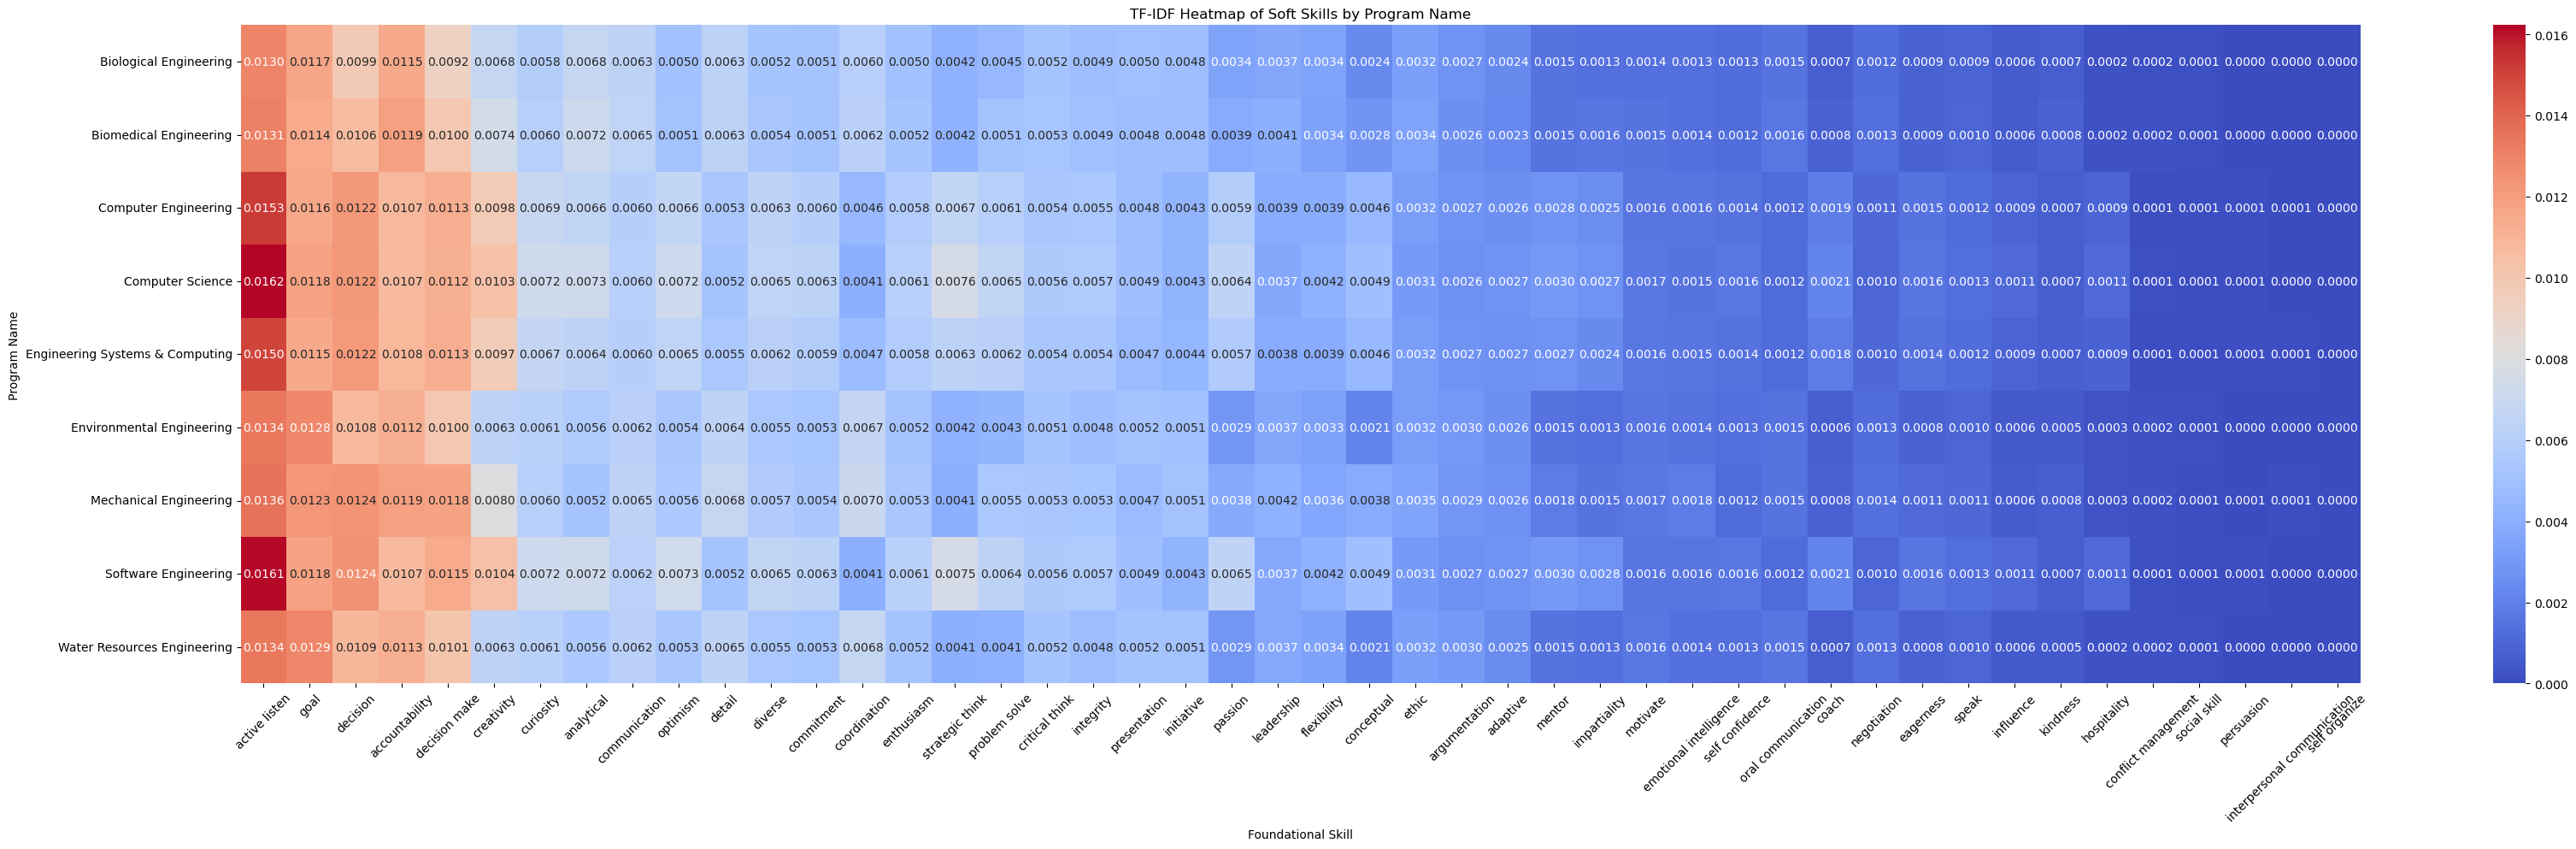

In [22]:
# Convert the pivot table data into a DataFrame
df = pd.DataFrame(df_soft_skills_tfidf_by_program_name).set_index('program_name')

# Create a heatmap with the specified configuration
plt.figure(figsize=(40, 10))
sns.heatmap(
    df,
    cmap="coolwarm",
    annot = True,
    fmt=".4f",
    cbar=True,
    yticklabels=True,
    xticklabels = True,
)
plt.title("TF-IDF Heatmap of Soft Skills by Program Name")
plt.xlabel("Foundational Skill")
plt.ylabel("Program Name")
plt.xticks(rotation=45)
plt.savefig("reports/figures/tf_idf_heatmap.png", bbox_inches="tight")
plt.show()